1. Run the apriori algorithm on the provided toy_dataset. Interpret the results.
2. Try to explore the checkpoint dataset using Pandas and Plotly.
3. Run the apriori algorithm on checkpoint dataset. Interpret the results and suggest a clear business plan to the supermarket owners based on your findings.

In [34]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
toy_dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]



In [36]:
te=TransactionEncoder()

#Apply one-hot-encoding on our dataset
te_array=te.fit(toy_dataset).transform(toy_dataset)    

#Creating a new DataFrame from our Numpy array
df=pd.DataFrame(te_array, columns=te.columns_)  

df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


# Support

In [37]:
apriori(df, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


# Confidence

In [38]:
# Using column names.

frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) 
frequent_itemsets


,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [39]:
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.25
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.25
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf,0.50
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6,1.00


# Interpretation
Let's examine the rule Skirt → Pants based on the metrics:

    60% of all transactions in the dataset include Skirt sales.
    80% of all transactions involve the purchase of Pants.
    We can say that 60% of the transactions involve both Skirt and Pants being purchased together.
    Every single customer who buys a Skirt will also buy Pants. This gives us a confidence of 100%.
    Customers who buy a Skirt are 12% more likely to buy Pants compared to those who do not buy a Skirt.
    The correlation between Skirt and Pants shows a leverage of 0.12, meaning they are purchased together more often than if they were independent.

As a result, since Skirt and Pants are frequently bought together, several strategies can be implemented to boost sales:

    Cross-Selling can be enhanced by recommending Pants when a customer is buying a Skirt.
    The store layout could be adjusted, placing Skirts and Pants in close proximity to encourage more sales of both items.
    Promotional campaigns could focus on promoting Pants to customers who show interest in Skirts.
    Bundling offers can be introduced, where customers receive a discount when purchasing both a Skirt and Pants.

# Market Basket Analysis

In [40]:
supermarket_df = pd.read_csv("Market_Basket_Optimisation.csv", header=None)
df.head()

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


The dataset above lacks column or index labels, so we'll treat each row as a transaction or basket. To prepare it for analysis, we need to restructure it by creating columns for each item and marking their presence in each transaction with True/False.

In [41]:
# Iterates through each row in the dataset, removes any NaN values, and creates a list of cleaned items (non-NaN) for each transaction.
# Appends each cleaned transaction (basket of items) to the basket_items list.
basket_items = []
for index, row in supermarket_df.iterrows():
    cleansed_items = [item for item in row if pd.notna(item)]  # Remove NaN values
    basket_items.append(cleansed_items)

In [42]:
# Encode the transactions and convert to a dataframe
encoder = TransactionEncoder()
transaction_encoded_list = encoder.fit(basket_items).transform(basket_items)
transaction_df = pd.DataFrame(transaction_encoded_list, columns=encoder.columns_)
transaction_df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [43]:
# Calculate item frequencies
item_frequencies = transaction_df.sum().reset_index()
item_frequencies.columns = ['Item', 'Frequency']  

# Sort the DataFrame by frequency in descending order
item_frequencies = item_frequencies.sort_values(by='Frequency', ascending=False)
item_frequencies

,Item,Frequency
72,mineral water,1788
37,eggs,1348
100,spaghetti,1306
43,french fries,1282
25,chocolate,1229
...,...,...
11,bramble,14
34,cream,7
77,napkins,5
112,water spray,3


In [44]:
item_frequencies_df = pd.DataFrame(item_frequencies)
item_frequencies_df.shape

(120, 2)

We have 120 unique items in our transactions

## Top 10 bought items

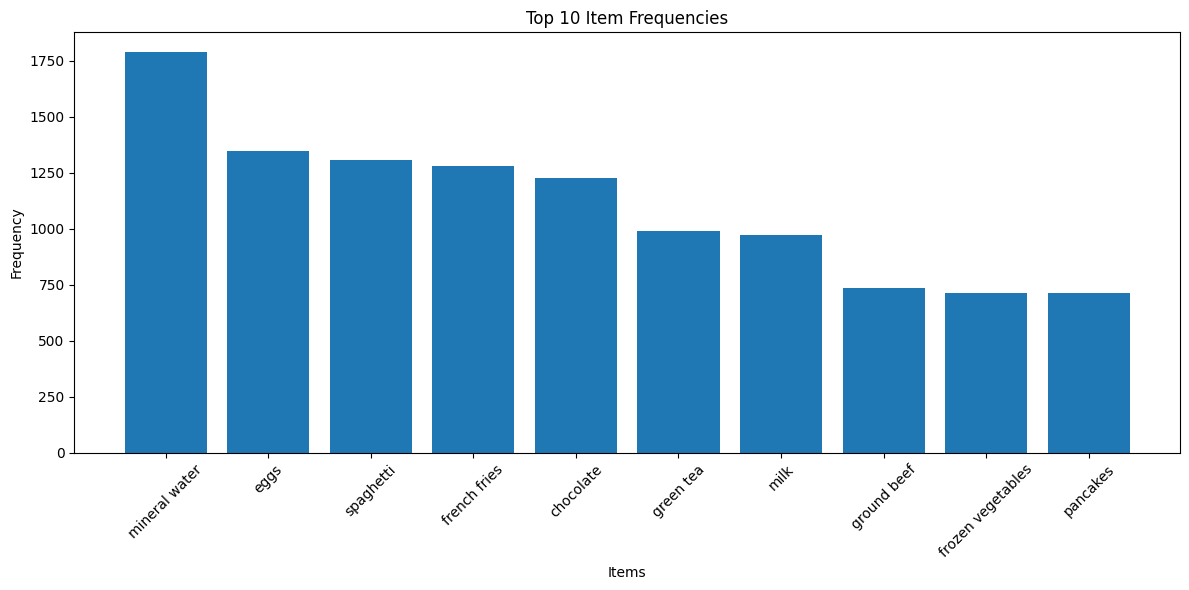

In [45]:
plt.figure(figsize=(12, 6)) 
plt.bar(item_frequencies['Item'][:10], item_frequencies['Frequency'][:10]) 
plt.title('Top 10 Item Frequencies')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
# Using column  column names.

supermarket_itemsets=apriori(transaction_df, min_support=0.05, use_colnames=True) 
supermarket_itemsets


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [58]:
supermarket_association = association_rules(supermarket_itemsets, metric="confidence", min_threshold=0.2)
supermarket_association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
4,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
5,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606


with confidence of 20% most of the association is with mineral water so we will drop it to understand other associations

In [61]:
# dropping mineral water
transactions_without_water = transaction_df.drop(columns=['mineral water'])

In [62]:
new_freq_itemset = apriori(transactions_without_water, min_support=0.02, use_colnames=True)
new_freq_itemset

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
...,...,...
77,0.035462,"(spaghetti, milk)"
78,0.022930,"(olive oil, spaghetti)"
79,0.025197,"(pancakes, spaghetti)"
80,0.021197,"(shrimp, spaghetti)"


In [64]:
new_association_rules = association_rules(new_freq_itemset, metric='confidence', min_threshold=0.2)
new_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
1,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,0.007096,1.108844,0.353384
2,(burgers),(spaghetti),0.087188,0.174110,0.021464,0.246177,1.413918,0.006283,1.095602,0.320707
3,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711,0.135143
4,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827,0.224169
5,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383,0.222275
6,(frozen vegetables),(chocolate),0.095321,0.163845,0.022930,0.240559,1.468215,0.007312,1.101015,0.352502
7,(ground beef),(chocolate),0.098254,0.163845,0.023064,0.234735,1.432669,0.006965,1.092635,0.334908
8,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823,0.389677
9,(spaghetti),(chocolate),0.174110,0.163845,0.039195,0.225115,1.373952,0.010668,1.079070,0.329550


In [66]:
# order by lift
new_association_rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
25,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
28,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
20,(frozen vegetables),(milk),0.095321,0.129583,0.023597,0.247552,1.910382,0.011245,1.156781,0.526755
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
31,(tomatoes),(spaghetti),0.068391,0.174110,0.020931,0.306043,1.757755,0.009023,1.190117,0.462740
23,(ground beef),(milk),0.098254,0.129583,0.021997,0.223881,1.727704,0.009265,1.121499,0.467090
30,(shrimp),(spaghetti),0.071457,0.174110,0.021197,0.296642,1.703760,0.008756,1.174209,0.444850
21,(frozen vegetables),(spaghetti),0.095321,0.174110,0.027863,0.292308,1.678867,0.011267,1.167018,0.446965
26,(spaghetti),(milk),0.174110,0.129583,0.035462,0.203675,1.571779,0.012900,1.093043,0.440468


There are meaningful associations, like:

ground beef -> spaghetti
olive oil-> spaghetti
milk-> eggs
burgers -> french fries
pancakes -> eggs
french fries -> chocolate

The top 10 most frequent items dominate  the association rules

